<a href="https://colab.research.google.com/github/prachisarode95/Indian_Agricultural_Commodity_Prices_Analysis_2019/blob/main/Agriculture_Commodity_Data_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [55]:
# Read CSV File
df = pd.read_csv("/content/commodity_data.gov.in-1.csv")

In [56]:
# Data Exploration
print("Dataset shape:", df.shape)

Dataset shape: (9185, 9)


In [57]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
                 state district       market     commodity variety  \
0  Andaman and Nicobar  Nicobar  Car Nicobar    Amaranthus   Other   
1  Andaman and Nicobar  Nicobar  Car Nicobar  Bitter gourd   Other   
2  Andaman and Nicobar  Nicobar  Car Nicobar  Bottle gourd   Other   
3  Andaman and Nicobar  Nicobar  Car Nicobar       Brinjal   Other   
4  Andaman and Nicobar  Nicobar  Car Nicobar       Cabbage   Other   

  arrival_date  min_price  max_price  modal_price  
0   24/07/2019       4000     8000.0       6000.0  
1   24/07/2019      12000    18000.0      15000.0  
2   24/07/2019       4000     8000.0       6000.0  
3   24/07/2019      10000    14000.0      12000.0  
4   24/07/2019       8000    12000.0      10000.0  


In [58]:
print("\nUnique dates (note: only one day):", df['arrival_date'].unique())


Unique dates (note: only one day): ['24/07/2019']


In [59]:
print("\nBasic statistics of prices:")
print(df[['min_price', 'max_price', 'modal_price']].describe())


Basic statistics of prices:
           min_price      max_price    modal_price
count    9185.000000    9185.000000    9185.000000
mean     3153.270985    3732.692880    3468.732335
std      5123.642932    5987.737744    5628.159422
min         0.000000       0.000000       1.000000
25%      1400.000000    1740.000000    1580.000000
50%      2200.000000    2650.000000    2500.000000
75%      3800.000000    4275.000000    4000.000000
max    300000.000000  340000.000000  320000.000000


In [60]:
# Prepare features and target
# Features: min_price and max_price
# Target: modal_price
X = df[['min_price', 'max_price']]
Y = df['modal_price']

In [61]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
X

,min_price,max_price
0,4000,8000.0
1,12000,18000.0
2,4000,8000.0
3,10000,14000.0
4,8000,12000.0
...,...,...
9180,3600,3700.0
9181,3800,4000.0
9182,3500,3600.0
9183,3700,3900.0


In [63]:
Y

,modal_price
0,6000.0
1,15000.0
2,6000.0
3,12000.0
4,10000.0
...,...
9180,3650.0
9181,3900.0
9182,3550.0
9183,3800.0


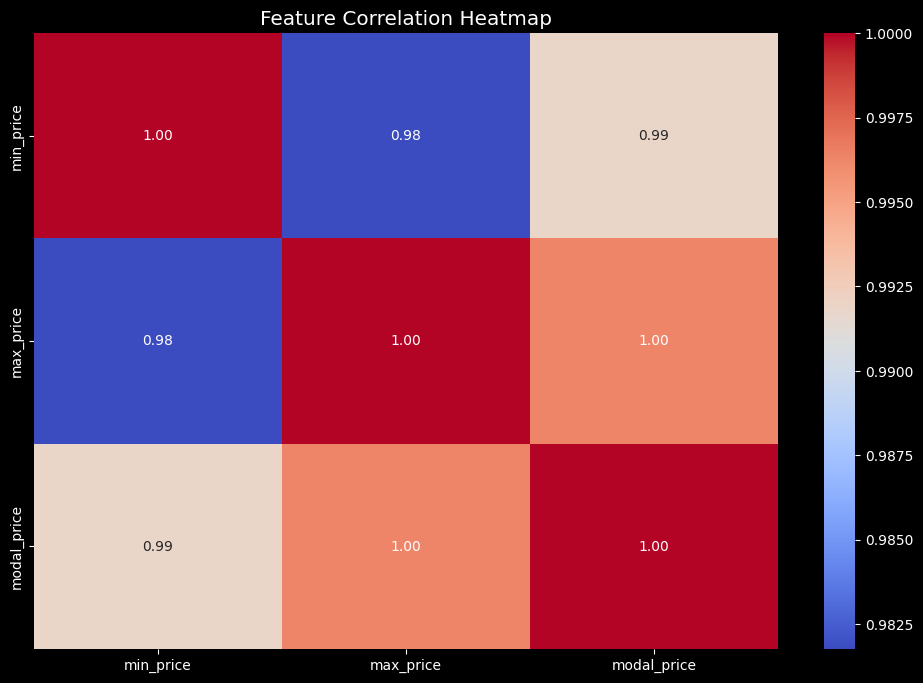

In [64]:
# Plot Feature Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [65]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [66]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

In [67]:
# Evaluate the model
print("\nModel Coefficients:")
print("Coefficient for min_price:", model.coef_[0])
print("Coefficient for max_price:", model.coef_[1])
print("Intercept:", model.intercept_)


Model Coefficients:
Coefficient for min_price: 0.43499742324513035
Coefficient for max_price: 0.5792010586862805
Intercept: -64.6663209407343


In [68]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 132113.03666880183
R² Score: 0.9979810778192706


In [69]:
# Compare to simple average (min + max)/2
Y_pred_avg = (X_test['min_price'] + X_test['max_price']) / 2
r2_avg = r2_score(Y_test, Y_pred_avg)
print("R² Score using simple average of min and max:", r2_avg)

R² Score using simple average of min and max: 0.9982393533743653


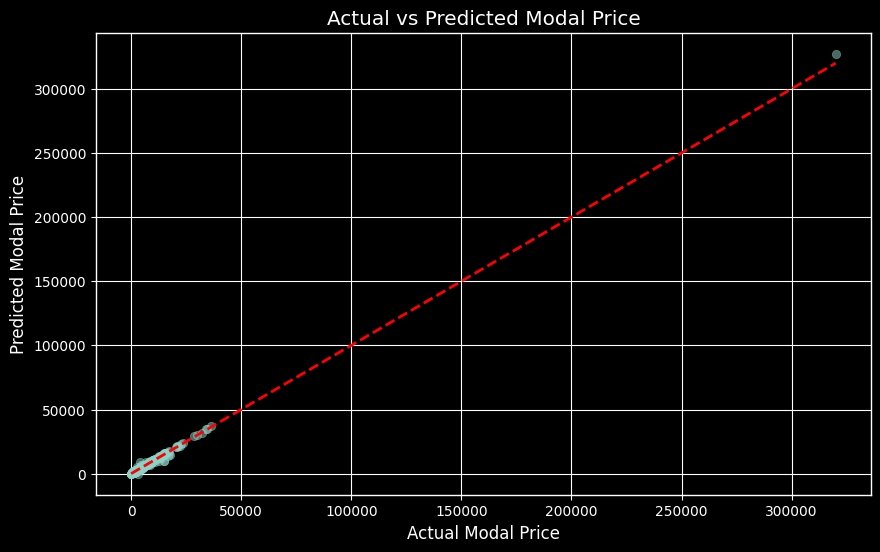

In [70]:
# Visualization - Actual vs Predicted Modal Price
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Modal Price')
plt.ylabel('Predicted Modal Price')
plt.title('Actual vs Predicted Modal Price')
plt.grid(True)
plt.show()

In [71]:
# Predict price for a sample data
sample = X.iloc[0:1]
predicted_price = model.predict(sample)

print("\nSample Prediction:")
print("Actual Price   :", Y.iloc[0])
print("Predicted Price:", predicted_price[0])


Sample Prediction:
Actual Price   : 6000.0
Predicted Price: 6308.931841530031


In [72]:
lr_model_diff = pd.DataFrame({'Actual Value' : Y_test, 'Predicted Value' : Y_pred})
lr_model_diff

,Actual Value,Predicted Value
5972,5350.0,5332.216179
3143,1400.0,1412.893008
4343,1800.0,1775.311310
6333,4600.0,4701.947218
1617,1300.0,1528.733220
...,...,...
4786,1700.0,1702.732189
3434,1952.0,1916.625810
5579,1000.0,963.952525
4241,17000.0,15246.628284


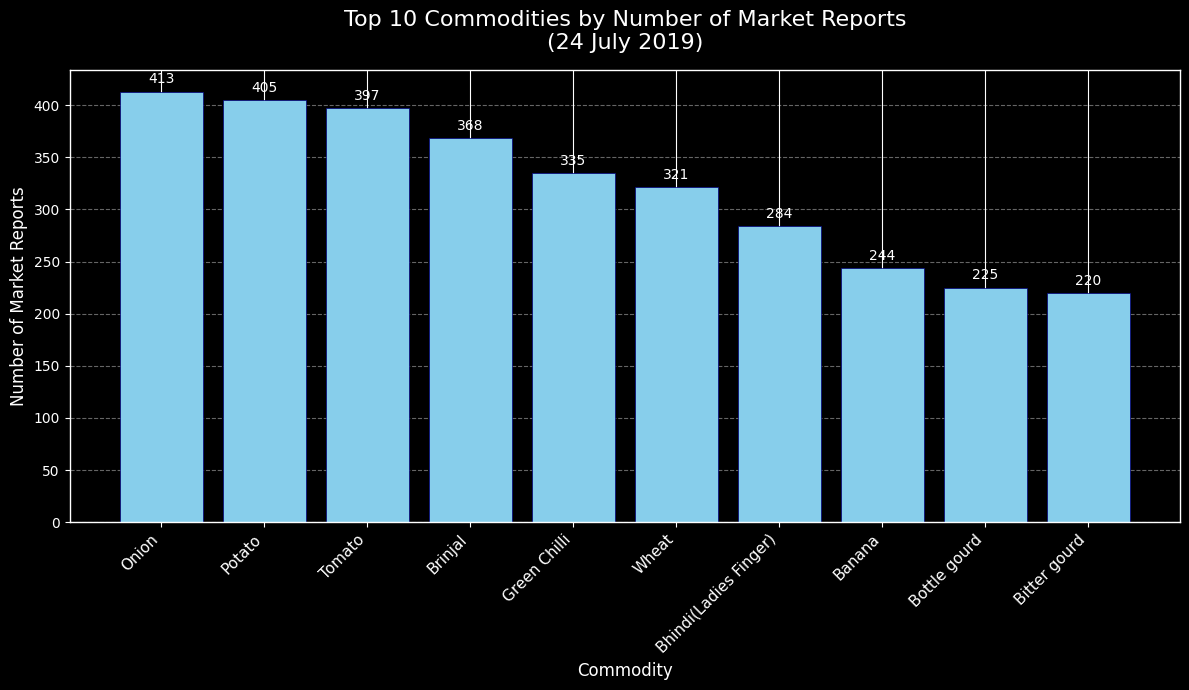

In [73]:
# Top 10 Commodities by Number of Market Reports
plt.figure(figsize=(12, 7))

top_commodities = df['commodity'].value_counts().head(10)

bars = plt.bar(top_commodities.index, top_commodities.values, color='skyblue', edgecolor='navy')

plt.title('Top 10 Commodities by Number of Market Reports\n(24 July 2019)', fontsize=16, pad=15)
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Number of Market Reports', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

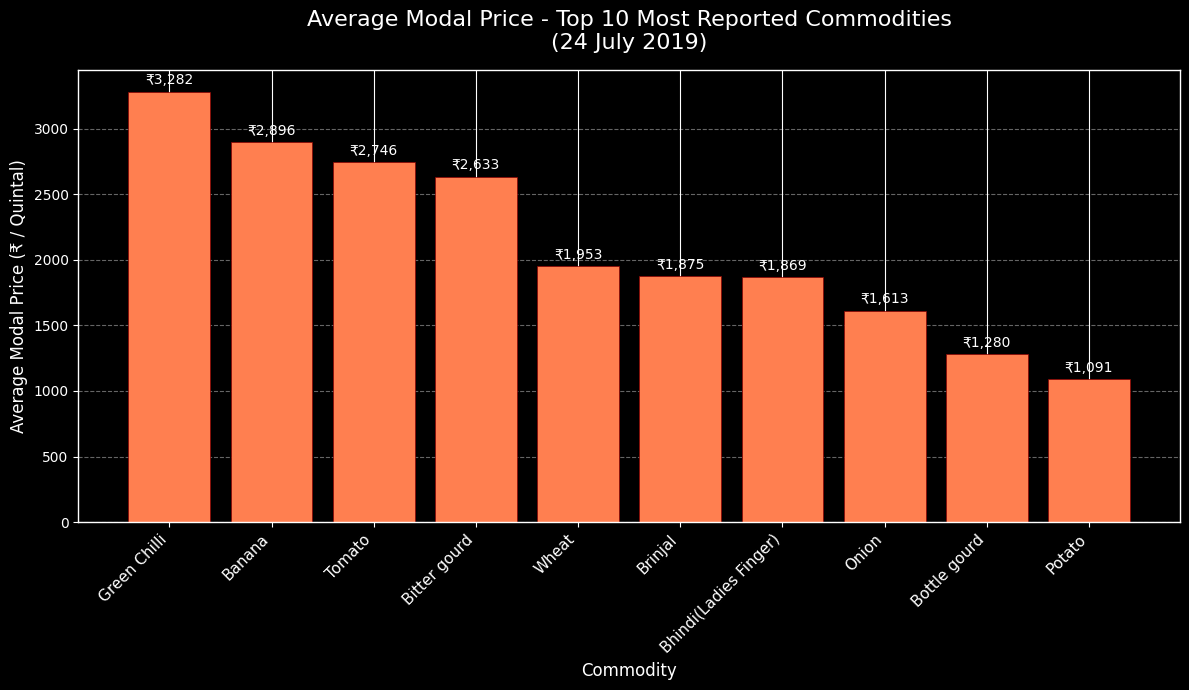

In [74]:
# Average modal price of top 10 most frequent commodities
top10_commodities = df['commodity'].value_counts().head(10).index

avg_price_top10 = df[df['commodity'].isin(top10_commodities)] \
    .groupby('commodity')['modal_price'].mean() \
    .sort_values(ascending=False)

plt.figure(figsize=(12, 7))

bars = plt.bar(avg_price_top10.index, avg_price_top10.values, color='coral', edgecolor='darkred')

plt.title('Average Modal Price - Top 10 Most Reported Commodities\n(24 July 2019)', fontsize=16, pad=15)
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Average Modal Price (₹ / Quintal)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + max(avg_price_top10)*0.01,
             f'₹{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

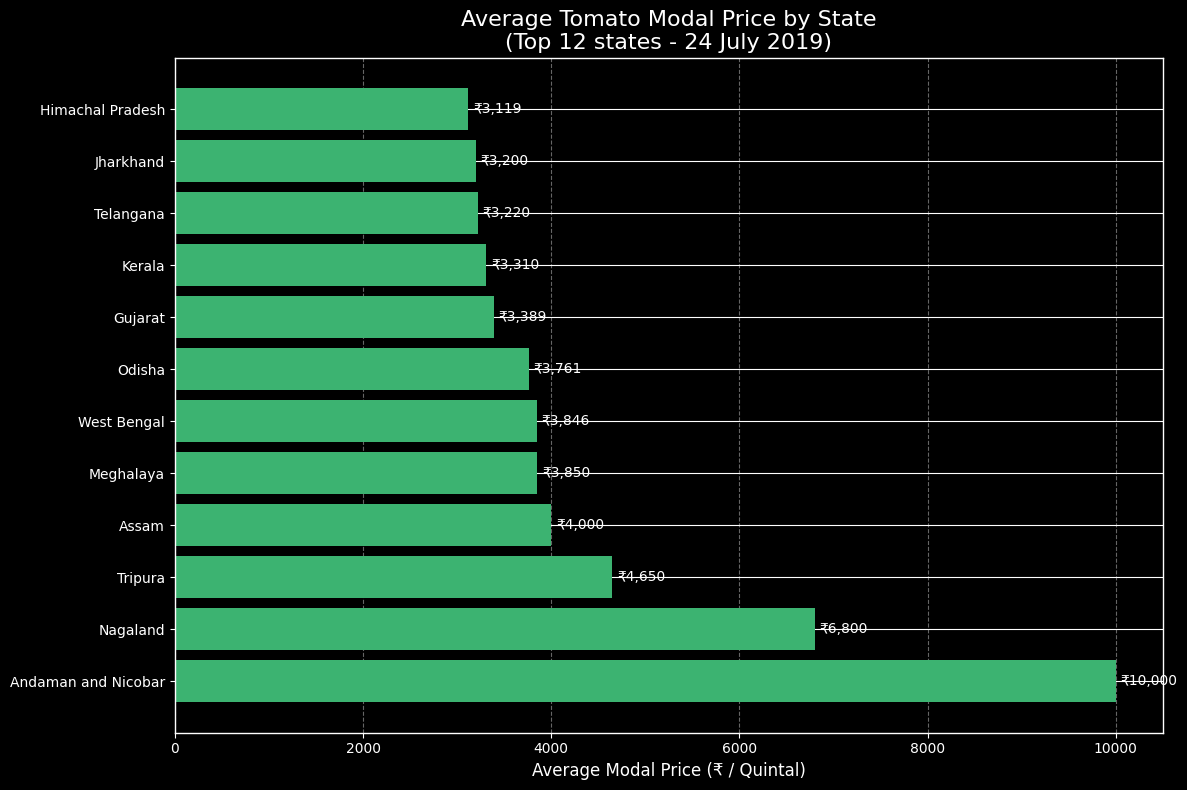


Number of tomato observations per state:
state
Andaman and Nicobar     1
Nagaland                1
Tripura                 1
Assam                   1
Meghalaya               1
West Bengal            25
Odisha                 31
Gujarat                14
Kerala                 38
Telangana               5
Jharkhand               1
Himachal Pradesh       18
Name: count, dtype: int64


In [75]:
# Tomato average price by state (top 10 states by price)
tomato = df[df['commodity'].str.lower().str.contains('tomato', na=False)]

state_avg_tomato = tomato.groupby('state')['modal_price'].agg(['mean','count']) \
    .sort_values('mean', ascending=False).head(12)

plt.figure(figsize=(12, 8))

bars = plt.barh(state_avg_tomato.index, state_avg_tomato['mean'], color='mediumseagreen')

plt.title('Average Tomato Modal Price by State\n(Top 12 states - 24 July 2019)', fontsize=16)
plt.xlabel('Average Modal Price (₹ / Quintal)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'₹{int(width):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nNumber of tomato observations per state:")
print(state_avg_tomato['count'])

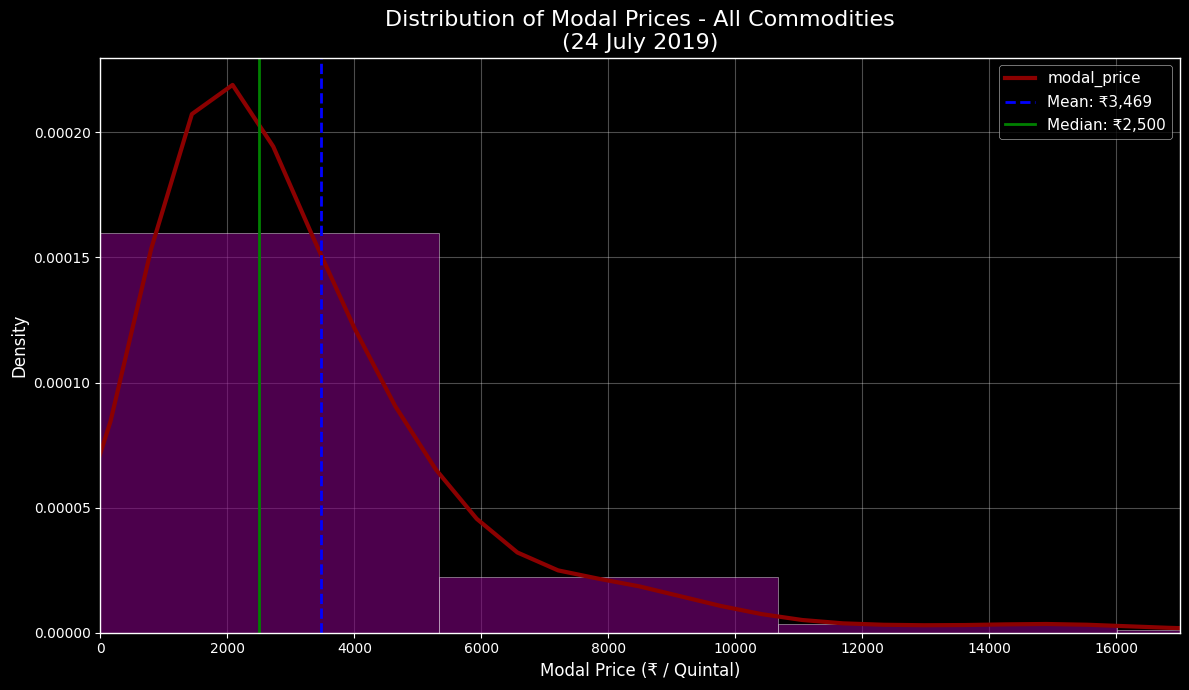

In [76]:
# Modal Price Distribution (All Commodities)
plt.figure(figsize=(12, 7))

plt.hist(df['modal_price'], bins=60, color='purple', alpha=0.6, density=True, edgecolor='white')
df['modal_price'].plot(kind='kde', color='darkred', linewidth=3)

plt.title('Distribution of Modal Prices - All Commodities\n(24 July 2019)', fontsize=16)
plt.xlabel('Modal Price (₹ / Quintal)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)

# Add mean & median
mean_price = df['modal_price'].mean()
median_price = df['modal_price'].median()

plt.axvline(mean_price, color='blue', linestyle='--', linewidth=2,
            label=f'Mean: ₹{mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2,
            label=f'Median: ₹{median_price:,.0f}')

plt.legend(fontsize=11)
plt.xlim(0, df['modal_price'].quantile(0.99))  # zoom to remove extreme outliers
plt.tight_layout()
plt.show()

In [77]:
# Several hypothetical market situations (mostly vegetables)
new_cases = pd.DataFrame({
    'min_price': [800,  2200,  4500,  120,   3200,  1800],
    'max_price': [1800, 4800,  9200,  380,   5800,  4200]
}, index=['Low quality tomato', 'Good onion', 'Premium ginger', 'Cheap potato', 'Fresh brinjal', 'Medium cabbage'])

predictions = model.predict(new_cases)
new_cases['predicted_modal'] = predictions.round(0).astype(int)
new_cases['simple_avg'] = ((new_cases['min_price'] + new_cases['max_price']) / 2).astype(int)

print("\nHypothetical market situations and predictions:")
print(new_cases)


Hypothetical market situations and predictions:
                    min_price  max_price  predicted_modal  simple_avg
Low quality tomato        800       1800             1326        1300
Good onion               2200       4800             3672        3500
Premium ginger           4500       9200             7221        6850
Cheap potato              120        380              208         250
Fresh brinjal            3200       5800             4687        4500
Medium cabbage           1800       4200             3151        3000
